In [198]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

SyntaxError: invalid syntax (<ipython-input-198-d960544c3de0>, line 1)

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [199]:
loc = '../data/'
file = 'data_features_outliers_detected.csv'
data = pd.read_csv(loc+file)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6314,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685,False,False
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685,False,False
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685,False,False


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [200]:
data = data[(data.outlier == False)&(data.lof_outlier == False)].reset_index(drop=True)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
5433,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685,False,False
5434,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685,False,False
5435,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685,False,False


#### <span style='color:green'> **[done]** </span>Filter by weight-class:

In [201]:
weight = "Women's Strawweight"
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

df = data[data['weight_class']==weight].reset_index(drop=True)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
206,lose,Kailin Curran,Paige VanZant,2014-11-22,Women's Strawweight,KO/TKO,Punches,-0.001066,-1.215702,0.791700,-2.559994,0.417205,0.928187,-0.4,0.337479,-0.734273,1.352524,0.957016,0.116418,0.021975,-0.363380,0.574988,False,False
207,win,Juliana Lima,Nina Nunes,2014-11-08,Women's Strawweight,U-DEC,Unanimous,-0.001066,-0.074057,0.399174,-1.701908,0.837522,-0.111170,-0.5,-1.543521,-0.074002,-0.854436,0.001307,0.116418,0.021975,0.380937,-0.592359,False,False
208,lose,Juliana Lima,Joanna Jedrzejczyk,2014-07-26,Women's Strawweight,U-DEC,Unanimous,-0.001066,-1.031565,0.399174,0.014263,0.820709,-0.353686,-0.1,-2.732514,-0.321604,-0.715315,-0.606872,0.116418,0.021975,-0.363380,0.574988,False,False


In [202]:
req_data = ['date','fighter','opponent','result','method']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = []

for column in df.columns:
    if ('_dif' in column and column not in y) or 'ratio' in column:
        X.append(column)

df = df[req_data + y + X]
df.head(3)

,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2023-04-15,Gillian Robertson,Piera Rodriguez,win,SUB,-0.001066,0.515179,0.399174,0.872349,-0.372990,-1.427688,1.0,-0.719404,0.256133,-0.101919,-0.606872,0.116418,-1.092102,0.753095,-0.592359
1,2023-04-08,Michelle Waterson-Gomez,Luana Pinheiro,lose,S-DEC,-0.001066,0.625661,0.399174,0.014263,-0.793306,0.754961,0.3,-0.146926,0.586269,0.220588,-1.041286,0.116418,-1.215888,-0.735539,1.742336
2,2023-04-08,Loopy Godinez,Cynthia Calvillo,win,S-DEC,-0.001066,-0.626466,-0.385877,0.014263,1.140150,-0.007234,-0.2,-0.625040,0.833871,-0.588842,-0.085576,0.116418,-0.101812,0.380937,-2.927054


## <span style='color:green'> **[done]** </span> XGBoost regressor model training:

In [203]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(209, 21), train_set=(112, 11), validation_set=(37, 11), test_set=(60, 11)


,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
206,test,2014-11-22,Kailin Curran,Paige VanZant,lose,KO/TKO,-0.001066,-1.215702,0.791700,-2.559994,0.417205,0.928187,-0.4,0.337479,-0.734273,1.352524,0.957016,0.116418,0.021975,-0.363380,0.574988
207,test,2014-11-08,Juliana Lima,Nina Nunes,win,U-DEC,-0.001066,-0.074057,0.399174,-1.701908,0.837522,-0.111170,-0.5,-1.543521,-0.074002,-0.854436,0.001307,0.116418,0.021975,0.380937,-0.592359
208,validation,2014-07-26,Juliana Lima,Joanna Jedrzejczyk,lose,U-DEC,-0.001066,-1.031565,0.399174,0.014263,0.820709,-0.353686,-0.1,-2.732514,-0.321604,-0.715315,-0.606872,0.116418,0.021975,-0.363380,0.574988


In [204]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
206,test,2014-11-22,Kailin Curran,Paige VanZant,lose,KO/TKO,-0.001066,-1.215702,0.791700,-2.559994,0.417205,0.928187,-0.4,0.337479,-0.734273,1.352524,0.957016,0.116418,0.021975,-0.363380,0.574988,-0.052085,-0.052085,-0.052085,-0.052085
207,test,2014-11-08,Juliana Lima,Nina Nunes,win,U-DEC,-0.001066,-0.074057,0.399174,-1.701908,0.837522,-0.111170,-0.5,-1.543521,-0.074002,-0.854436,0.001307,0.116418,0.021975,0.380937,-0.592359,0.363110,0.363110,0.363110,0.363110
208,validation,2014-07-26,Juliana Lima,Joanna Jedrzejczyk,lose,U-DEC,-0.001066,-1.031565,0.399174,0.014263,0.820709,-0.353686,-0.1,-2.732514,-0.321604,-0.715315,-0.606872,0.116418,0.021975,-0.363380,0.574988,-0.090878,-0.090878,-0.090878,-0.090878


In [205]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='validation']
    pred = df[column+'_pred'][df.set=='validation'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.853425


### <span style='color:green'> **[done]** </span>GridSearch (=Parameter tuning):

In [206]:
parameters = {'learning_rate': [0.1,0.05,0.01],
              'subsample': [0.8,0.9,1.0],
              'n_estimators':[100,200,300]
}

xgboost_reg = XGBRegressor(objective='reg:squarederror') #objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgboost_reg, param_grid=parameters, cv=5,error_score='raise')

X_train = df[X][df.set=='train']
y_train = df[y][df.set=='train']
grid_search.fit(X_train,y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.8}
Best score:  0.08158437072542134


In [207]:
grid = pd.DataFrame(grid_search.cv_results_['params'])
#rmse = np.power(grid_search.cv_results_['mean_test_score'],0.5)

grid['squared_error'] = grid_search.cv_results_['mean_test_score'] #grid_search.cv_results_['mean_test_score']
g = grid[grid.squared_error==np.min(grid.squared_error)].reset_index(drop=True)
g

,learning_rate,n_estimators,subsample,squared_error
0,0.05,300,1.0,-0.161389


<AxesSubplot:xlabel='learning_rate', ylabel='subsample'>

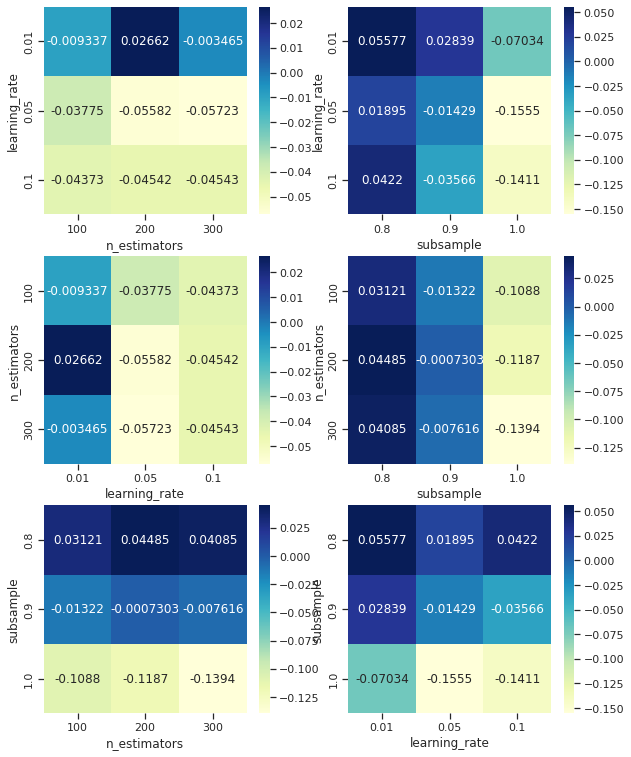

In [208]:
rows=3
cols=2
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (10,13))

y_axis = 'learning_rate'
table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='n_estimators')
sns.heatmap(ax=axs[0,0], data = table, cmap='YlGnBu', annot=True, fmt='.4g')

table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='subsample')
sns.heatmap(ax=axs[0,1], data = table, cmap='YlGnBu', annot=True, fmt='.4g')

y_axis = 'n_estimators'
table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='learning_rate')
sns.heatmap(ax=axs[1,0], data = table, cmap='YlGnBu', annot=True, fmt='.4g')

table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='subsample')
sns.heatmap(ax=axs[1,1], data = table, cmap='YlGnBu', annot=True, fmt='.4g')

y_axis = 'subsample'
table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='n_estimators')
sns.heatmap(ax=axs[2,0], data = table, cmap='YlGnBu', annot=True, fmt='.4g')

table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='learning_rate')
sns.heatmap(ax=axs[2,1], data = table, cmap='YlGnBu', annot=True, fmt='.4g')

#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [209]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=g.loc[0,'n_estimators'], learning_rate=g.loc[0,'learning_rate'], subsample=g.loc[0,'subsample'], max_depth=len(X))
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,method,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
206,test,2014-11-22,Kailin Curran,Paige VanZant,lose,KO/TKO,-0.001066,-1.215702,0.791700,-2.559994,0.417205,0.928187,-0.4,0.337479,-0.734273,1.352524,0.957016,0.116418,0.021975,-0.363380,0.574988,-0.017205,-0.017205,-0.017205,-0.017205
207,test,2014-11-08,Juliana Lima,Nina Nunes,win,U-DEC,-0.001066,-0.074057,0.399174,-1.701908,0.837522,-0.111170,-0.5,-1.543521,-0.074002,-0.854436,0.001307,0.116418,0.021975,0.380937,-0.592359,-0.005899,-0.005899,-0.005899,-0.005899
208,validation,2014-07-26,Juliana Lima,Joanna Jedrzejczyk,lose,U-DEC,-0.001066,-1.031565,0.399174,0.014263,0.820709,-0.353686,-0.1,-2.732514,-0.321604,-0.715315,-0.606872,0.116418,0.021975,-0.363380,0.574988,0.070090,0.070090,0.070090,0.070090


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [210]:
save_trained_model(model=xgboost_reg,filename_path='../global_variables/stats_pred_' + set_lower_cases(weight) + '_xgboost_reg')

../global_variables/stats_pred_womensstrawweight_xgboost_reg.pkl saved.


#### <span style='color:green'> **[done]** </span> Saving statistic prediction data:

In [211]:
df.to_csv('../data/model_stats_pred_' + set_lower_cases(weight) + '_data_trained.csv', index=None)
print('../data/model_stats_pred_' + set_lower_cases(weight) + '_data_trained.csv saved.')

../data/model_stats_pred_womensstrawweight_data_trained.csv saved.
